# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때보다 어렵다.
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리이다.

In [1]:
import pandas as pd

train = pd.read_csv('../data/train_20k.csv', header=None)
test = pd.read_csv('../data/test_1k.csv', header=None)
print(train.head())
print(test.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
### Preprocessing(전처리)

In [3]:
# null check
train.isnull().sum().sum()

0

In [4]:
test.isnull().sum().sum()

0

In [27]:
train.drop(0, axis=1).max().max()

255

In [20]:
# train과 test를 feature, target으로 분리하고 정규화하기
train_data = train.drop(0, axis=1) / 255.0
train_label = train[0]

test_data = test.drop(0, axis=1) / 255.0
test_label = test[0]

### Deep Learning Model 만들기

In [28]:
# GPU 사용 설정

import os

In [29]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [30]:
from tensorflow import keras

In [36]:
train_data.shape

(20001, 784)

In [37]:
train_label.shape

(20001,)

In [42]:
train_label

0        5
1        0
2        4
3        1
4        9
        ..
19996    5
19997    1
19998    4
19999    2
20000    5
Name: 0, Length: 20001, dtype: int64

In [31]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax')) # label 10개

In [43]:
model.compile(
    loss='sparse_categorical_crossentropy', # data가 표준화되어있음.
    optimizer='adam',
    metrics='accuracy'
)

In [44]:
# 데이터 훈련하기
import numpy as np

model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs=50
)

Epoch 1/50
626/626 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.9096
Epoch 2/50
626/626 [==============================] - 2s 3ms/step - loss: 0.1287 - accuracy: 0.9625
Epoch 3/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0807 - accuracy: 0.9755
Epoch 4/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0526 - accuracy: 0.9838
Epoch 5/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0326 - accuracy: 0.9907
Epoch 6/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9947
Epoch 7/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9940
Epoch 8/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9971
Epoch 9/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 10/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0066 - accuracy: 0.9987

---
### 테스트데이터로 평가하기

In [51]:
score = model.evaluate(test_data, np.array(test_label))
print('loss :', score[0])
print('accuracy :', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9770
loss : 0.1229439303278923
accuracy : 0.9770230054855347


---
### test data로 predict

In [50]:
pred = model.predict(test_data)
print('test label :', test_label[:10])
print('pred :', np.argmax(pred[:10], axis=1)) # arg : index, 제일 확률이 높은값(max)의 index를 불러온다.

32/32 [==============================] - 0s 1ms/step
test label : 0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64
pred : [7 2 1 0 4 1 4 9 5 9]


In [52]:
np.argmax(np.array([1,4,3,2]))

1

---
# 번외
- Image 만들기

In [53]:
from PIL import Image

In [54]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.drop(0, axis=1)
train1.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
train1.shape

(20001, 784)

In [56]:
# train_data의 50번째 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [57]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8)) # 8비트인 이유, 그레이스케일이라 컬러값이 없어서
image

In [58]:
# image 저장하기
image.save('../data/mnist_test_3.jpg', 'JPEG')

---
### 이미지를 불러와서 predict 하기

In [59]:
# Image 불러오기
img = Image.open('../data/mnist_test_3.jpg')
img

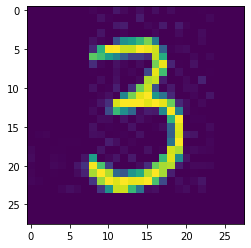

In [60]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [62]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [63]:
# image를 1차원으로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [64]:
# list 만들기
imgArray3 = imgArray2.tolist()

In [65]:
# list를 dataframe으로 바꾸기
dfArray = pd.DataFrame(imgArray3)

In [66]:
dfArray

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [67]:
dfArray.T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> 아까 학습한 형식으로 맞춰주는 과정

In [69]:
print('예측값 :', np.argmax(model.predict(dfArray.T), axis=1))

1/1 [==============================] - 0s 27ms/step
예측값 : [3]


In [70]:
model.predict(dfArray.T)

1/1 [==============================] - 0s 18ms/step


array([[3.1526937e-17, 1.5192840e-12, 1.7012819e-14, 1.0000000e+00,
        4.3395699e-19, 2.9409974e-11, 6.0789313e-22, 5.3422845e-19,
        1.2441208e-16, 2.5739774e-10]], dtype=float32)